## 1、上证指数

In [20]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

#引入TA-Lib库
import talib as ta

In [22]:
#查看包含的技术指标和数学运算函数
#print(ta.get_functions())
#print(ta.get_function_groups())

In [23]:
ta_fun=ta.get_function_groups()
ta_fun.keys()

#使用tushare获取上证指数数据作为示例
import tushare as ts
df=ts.get_k_data('sh',start='2010-01-01')
df.index=pd.to_datetime(df.date)
df=df.sort_index()


本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [24]:
df

,date,open,close,high,low,volume,code
date,,,,,,,
2010-01-04,2010-01-04,3289.750,3243.760,3295.28,3243.32,109447927.0,sh
2010-01-05,2010-01-05,3254.468,3282.179,3290.51,3221.46,126115066.0,sh
2010-01-06,2010-01-06,3277.517,3254.215,3295.87,3253.04,123651384.0,sh
2010-01-07,2010-01-07,3253.991,3192.776,3268.82,3176.71,128652827.0,sh
2010-01-08,2010-01-08,3177.259,3195.997,3198.92,3149.02,98377147.0,sh
...,...,...,...,...,...,...,...
2020-11-13,2020-11-13,3327.230,3310.100,3327.23,3291.64,227898364.0,sh
2020-11-16,2020-11-16,3325.620,3346.970,3346.97,3313.65,279593761.0,sh
2020-11-17,2020-11-17,3347.150,3339.900,3347.70,3323.95,283632479.0,sh


In [25]:
types=['SMA','EMA','WMA','DEMA','TEMA','TRIMA','KAMA','MAMA','T3']
df_ma=pd.DataFrame(df.close)
df_ma

,close
date,
2010-01-04,3243.760
2010-01-05,3282.179
2010-01-06,3254.215
2010-01-07,3192.776
2010-01-08,3195.997
...,...
2020-11-13,3310.100
2020-11-16,3346.970
2020-11-17,3339.900


In [26]:
for i in range(len(types)):
    df_ma[types[i]]=ta.MA(df.close,timeperiod=5,matype=i)
df_ma.tail()

,close,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,MAMA,T3
date,,,,,,,,,,
2020-11-13,3310.10,3344.972,3327.926848,3335.056667,3331.659895,3322.604643,3345.343333,3328.714138,3328.166729,3344.559937
2020-11-16,3346.97,3339.620,3334.274565,3335.722667,3340.995075,3336.949882,3336.417778,3329.637109,3329.106892,3345.269303
2020-11-17,3339.90,3335.570,3336.149710,3335.816000,3341.880147,3338.523302,3331.522222,3330.024353,3329.646548,3345.312462
2020-11-18,3347.30,3336.590,3339.866473,3339.726000,3346.164607,3344.305175,3336.321111,3330.201703,3330.529220,3345.898673
2020-11-19,3363.09,3341.472,3347.607649,3348.559333,3356.967188,3357.768504,3342.381111,3331.765968,3332.157259,3348.735662


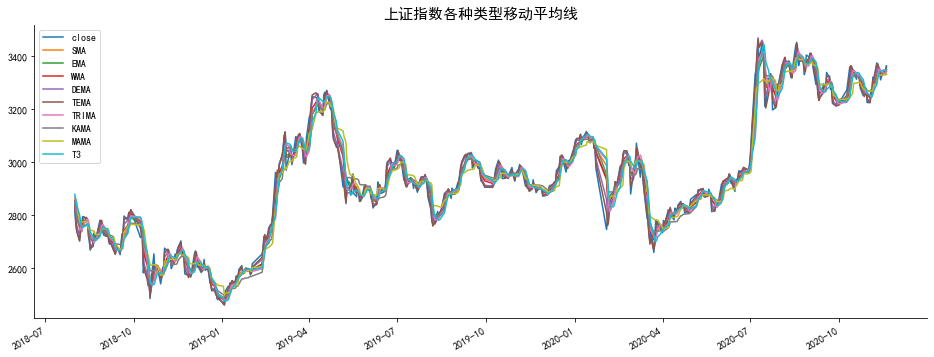

In [27]:
df_ma.loc['2018-08-01':].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数各种类型移动平均线',fontsize=15)
plt.xlabel('')
plt.show()

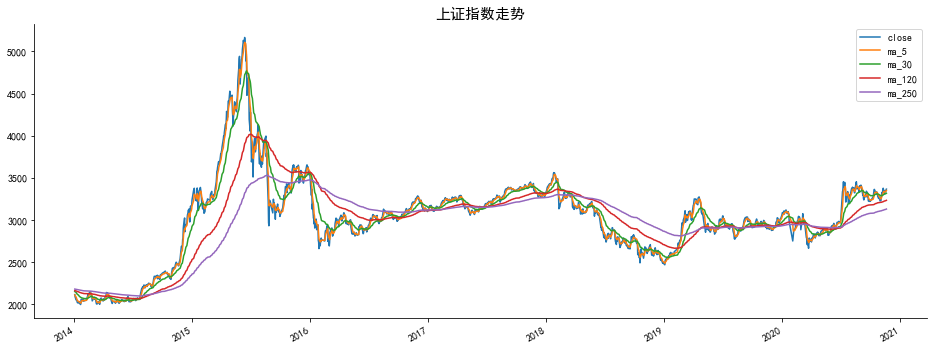

In [28]:
#画5、30、120、250指数移动平均线
N=[5,30,120,250]
for i in N:
    df['ma_'+str(i)]=ta.EMA(df.close,timeperiod=i)
df.tail()

df.loc['2014-01-01':,['close','ma_5','ma_30','ma_120','ma_250']].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数走势',fontsize=15)
plt.xlabel('')
plt.show()

## 2、 布林带


布林带(Bollinger Band)，由压力线、支撑线价格平均线组成，一般情况价格线在压力线和支撑线组成的上下区间中游走，区间位置会随着价格的变化而自动调整。布林线的理论使用原则是：当股价穿越最外面的压力线（支撑线）时，表示卖点（买点）出现。当股价延着压力线（支撑线）上升（下降）运行，虽然股价并未穿越，但若回头突破第二条线即是卖点或买点。在实际应用中，布林线有其滞后性，相对于其他技术指标在判断行情反转时参考价值较低，但在判断盘整行情终结节点上成功率较高。



计算方法：首先计出过去 N 日收巿价的标准差 SD(Standard Deviation) ，通常再乘 2 得出 2 倍标准差， Up 线为 N日平均线加 2 倍标准差， Down 线则为 N日平均线减 2 倍标准差。

代码：ta.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)

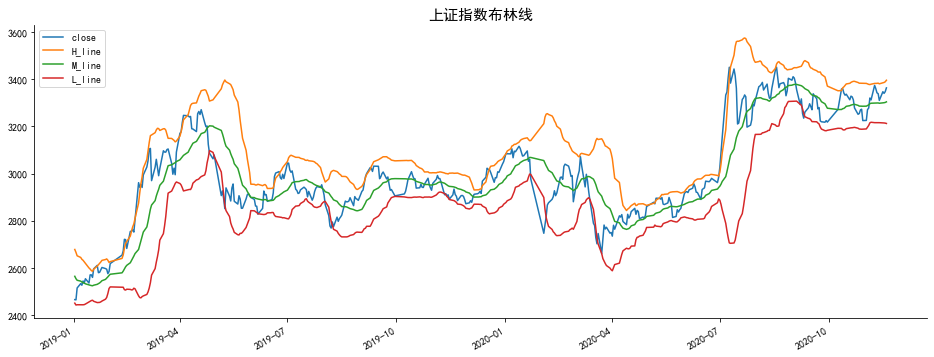

In [29]:
H_line,M_line,L_line=ta.BBANDS(df.close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
df1=pd.DataFrame(df.close,index=df.index,columns=['close'])
df1['H_line']=H_line
df1['M_line']=M_line
df1['L_line']=L_line
df1.tail()

df1.loc['2019-01-01':'2021-12-30'].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数布林线',fontsize=15)
plt.xlabel('')
plt.show()

## 3、其他指标
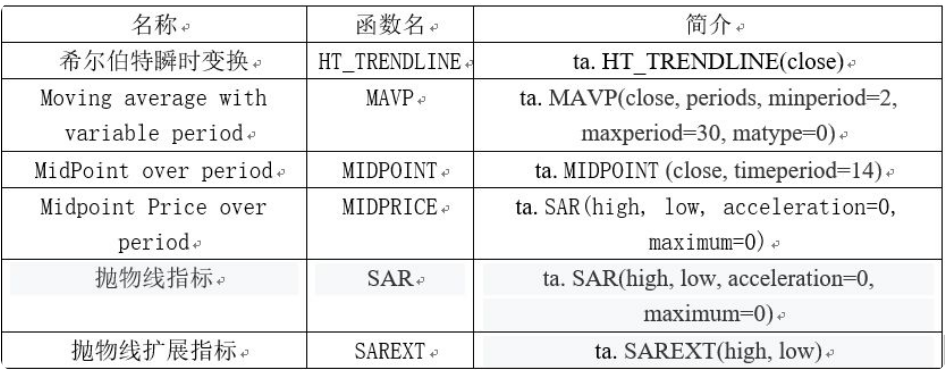



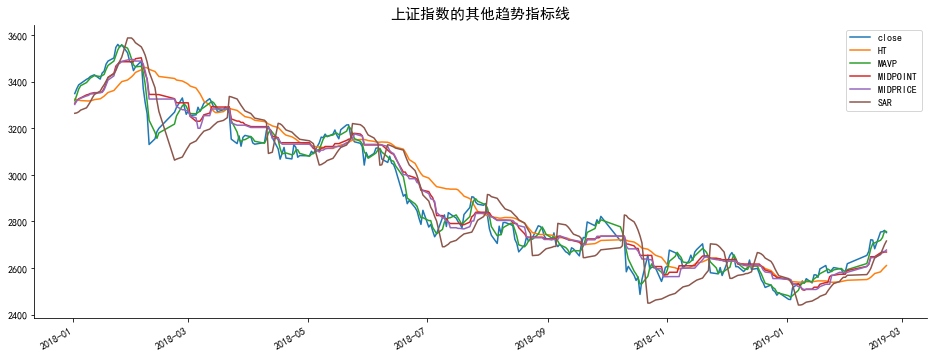

In [30]:
df2=pd.DataFrame(df.close)
df2['HT']=ta.HT_TRENDLINE(df.close)
periods =np.array([3]*len(df), dtype=float)
df2['MAVP']=ta. MAVP(df.close,periods)
df2['MIDPOINT']=ta.MIDPOINT(df.close)
df2['MIDPRICE']=ta.MIDPRICE(df.high,df.low)
df2['SAR']=ta.SAR(df.high,df.low)
df2['SAREXT']=ta.SAREXT(df.high,df.low)
df2.tail()

df2.loc['2018-01-01':'2019-02-21',['close','HT','MAVP','MIDPOINT','MIDPRICE','SAR']].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数的其他趋势指标线',fontsize=15)
plt.xlabel('')
plt.show()

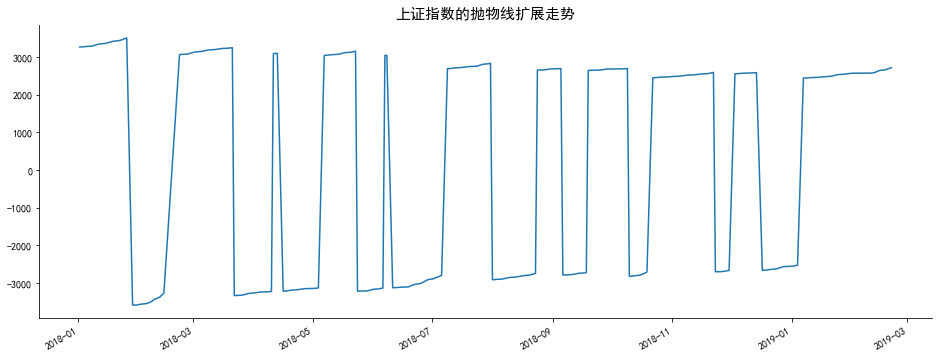

In [31]:
df2.loc['2018-01-01':'2019-02-21','SAREXT'].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数的抛物线扩展走势',fontsize=15)
plt.xlabel('')
plt.show()

## 4、均线策略回测
双均线策略：分别选择L天和S天的移动平均线（L>S），如L=20，S=5，当短周期S均线（5日均线）向上突破长周期L均线（20日均线）时，为买入点；反之，当S均线向下击穿L均线时为卖出点。

标的：中国平安（601318），期间：2014.1-2019.1，回测结果：

## 5、Price Transform 价格转换
TA-Lib模块中提供的价格转换函数有四个，主要用于计算开盘价、收盘价、最高价、最低价之间的均值，具体如下表所示。
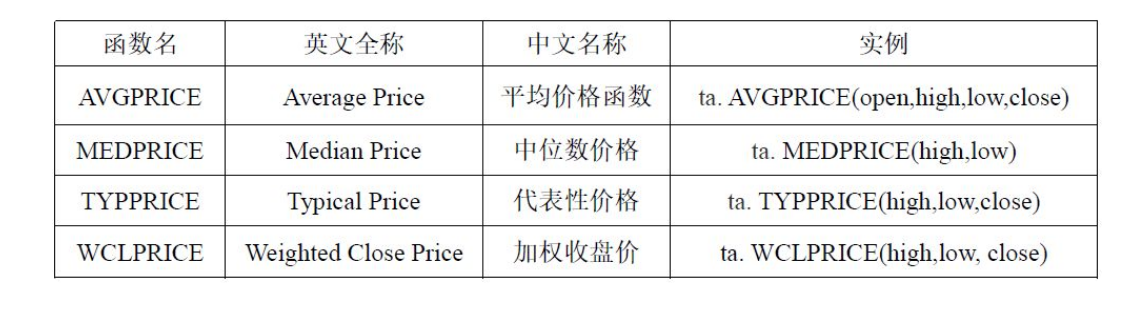

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


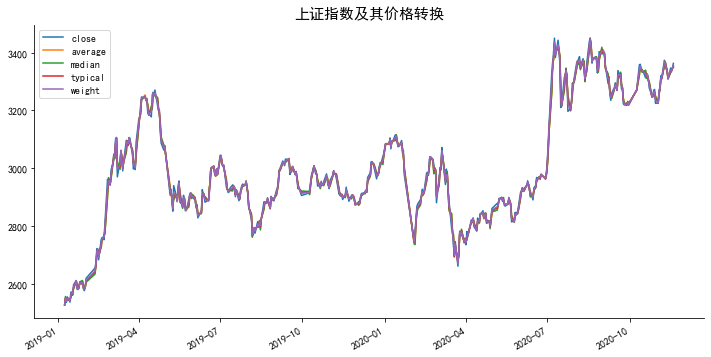

In [32]:
#先引入后面可能用到的包（package）

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

#引入TA-Lib库
import talib as ta

#获取交易数据用于示例分析
import tushare as ts
def get_data(code,start='2015-01-01'):
    df=ts.get_k_data(code,start)
    df.index=pd.to_datetime(df.date)
    df=df.sort_index()
    return df

#获取上证指数收盘价、最高、最低价格
df=get_data('sh')[['open','close','high','low']]

#开盘价，最高价，最低价，收盘价的均值
df['average']=ta.AVGPRICE(df.open,df.high,df.low,df.close)
#最高价，最低价的均值
df['median']=ta.MEDPRICE(df.high,df.low)
#最高价，最低价，收盘价的均值
df['typical']=ta.TYPPRICE(df.high,df.low,df.close)
#最高价，最低价，收盘价的加权
df['weight']=ta.WCLPRICE(df.high,df.low,df.close)
df.head()

df.loc['2019-01-08':,['close','average','median','typical','weight']].plot(figsize=(12,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数及其价格转换',fontsize=15)
plt.xlabel('')
plt.show()

## 6、Cycle Indicator Functions周期指标函数
希尔伯特变换(Hilbert Transform)是积分变换中的一种，在信号处理领域得到了广泛的应用，而在工程中常用于窄带数字信号的处理。金融市场的波动是非周期、不规律的，但只要存在波动，就可以通过希尔伯特变换寻找其“周期性”。对于股价走势，一般可将其分解为：长期趋势、中短期周期性波动和噪声。在去除长期趋势的情况下，可以利用希尔伯特变换对中短期的周期性波动进行分析。关于希尔伯特变换原理及其在短线择时中的应用可参考广发证券金融工程专题报告《希尔伯特变换下的短线择时策略》（公众号Python金融量化后台回复：“希尔伯特”，获取免费下载地址）
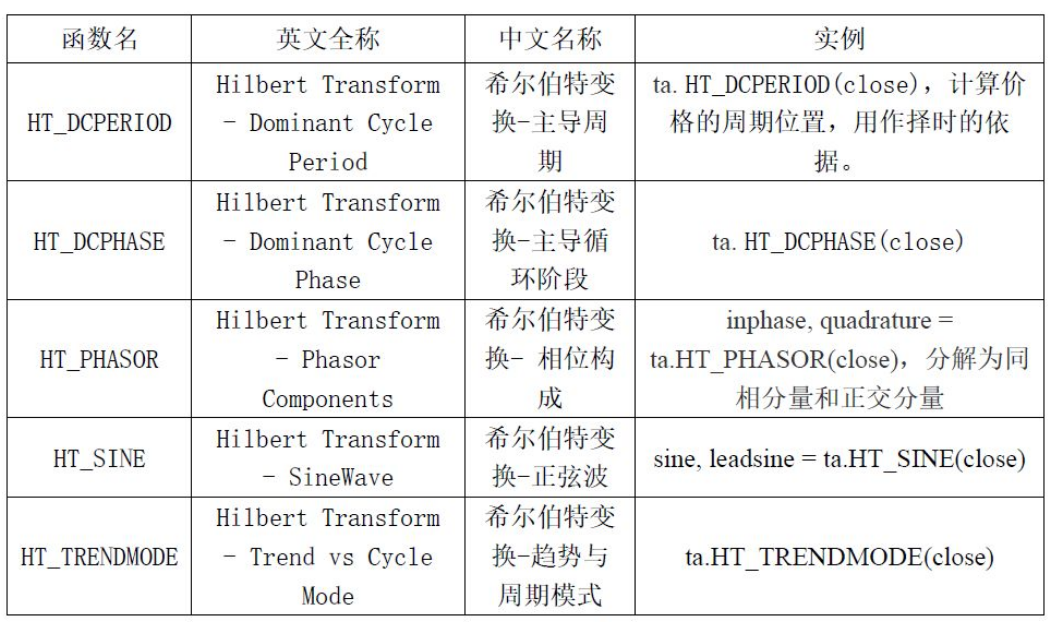

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


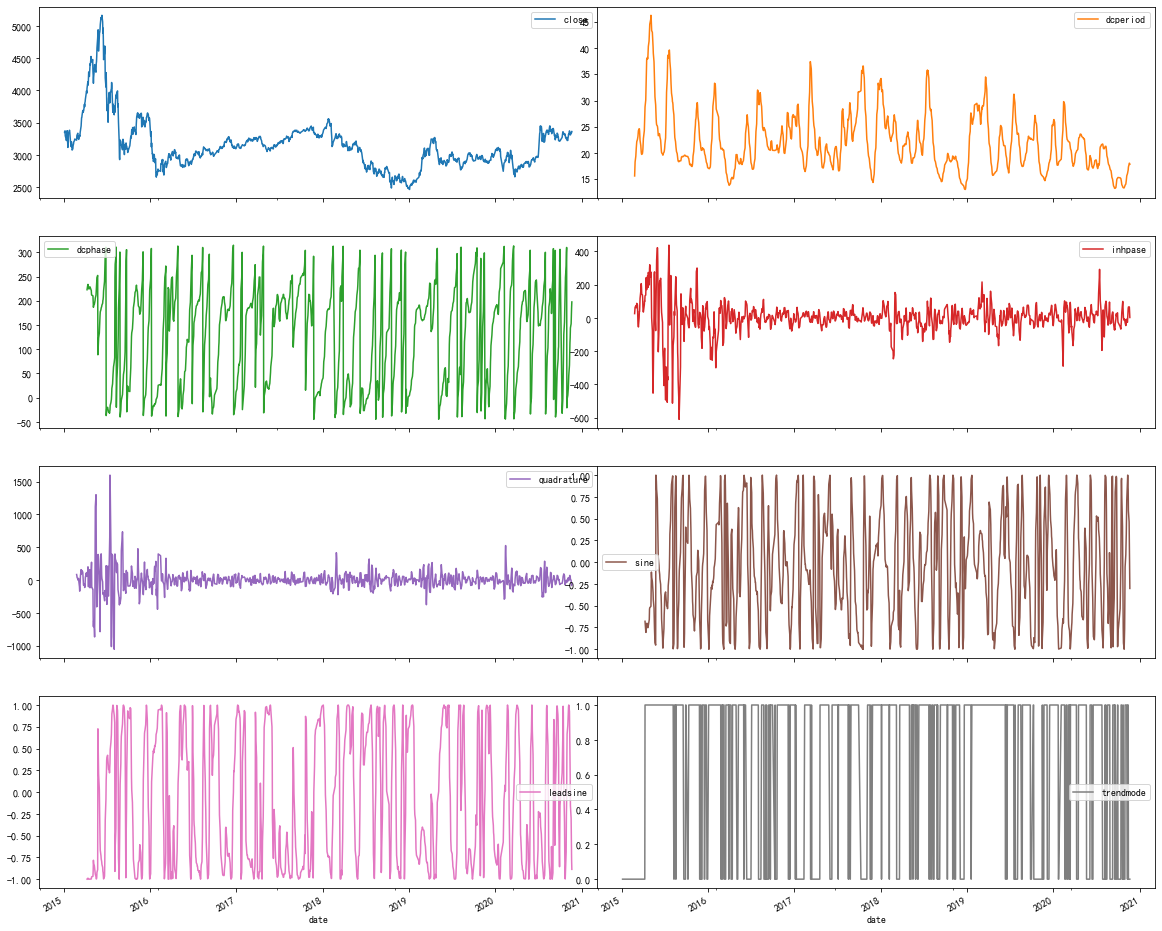

In [33]:
df=get_data('sh')[['open','close','high','low']]
df['dcperiod']=ta.HT_DCPERIOD(df.close)
df['dcphase']=ta.HT_DCPHASE(df.close)
df['inhpase'],df['quadrature']=ta.HT_PHASOR(df.close)
df['sine'],df['leadsine']=sine, leadsine = ta.HT_SINE(df.close)
df['trendmode']=ta.HT_TRENDMODE(df.close)
df

#将上述函数计算得到的结果进行可视化
df[['close','dcperiod','dcphase','inhpase','quadrature','sine','leadsine','trendmode']].plot(figsize=(20,18),
       subplots = True,layout=(4, 2))
plt.subplots_adjust(wspace=0,hspace=0.2)

## 7、Volatility Indicator Functions 波动率指标
当前交易日最高价与最低价差值，前一交易日收盘价与当前交易日最高价间的差值，前一交易日收盘价与当前交易日最低价的差值，这三者中的最大值为真实波幅。即真实波动幅度 = max(最大值,昨日收盘价) − min(最小值,昨日收盘价)，平均真实波动幅度等于真实波动幅度的N日指数移动平均数。波动幅度可以显示出交易者的期望和热情。波动幅度的急剧增加表示交易者在当天可能准备持续买进或卖出股票，波动幅度的减少则表示交易者对股市没有太大的兴趣。波动率指标可用于衡量价格的波动情况，辅助判断趋势改变的可能性，市场的交易氛围，也可以利用波动性指标来帮助止损止盈。
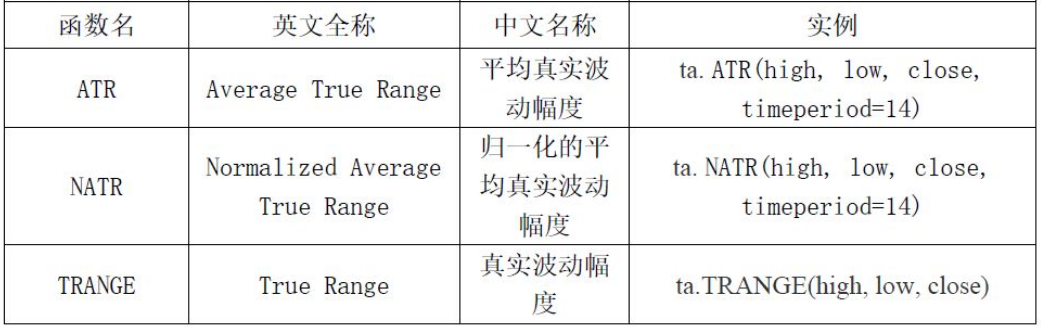

In [34]:
df=get_data('sh')[['open','close','high','low']]
df['atr']=ta.ATR(df.high, df.low, df.close, timeperiod=14)
df['natr']=ta.NATR(df.high, df.low, df.close, timeperiod=14)
df['trange']=ta.TRANGE(df.high, df.low, df.close)
df.tail()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,open,close,high,low,atr,natr,trange
date,,,,,,,
2020-11-13,3327.23,3310.10,3327.23,3291.64,41.988901,1.268509,47.04
2020-11-16,3325.62,3346.97,3346.97,3313.65,41.623265,1.243610,36.87
2020-11-17,3347.15,3339.90,3347.70,3323.95,40.346604,1.208018,23.75
2020-11-18,3337.33,3347.30,3358.89,3333.99,39.243275,1.172386,24.90
2020-11-19,3339.09,3363.09,3367.33,3330.45,39.074469,1.161862,36.88


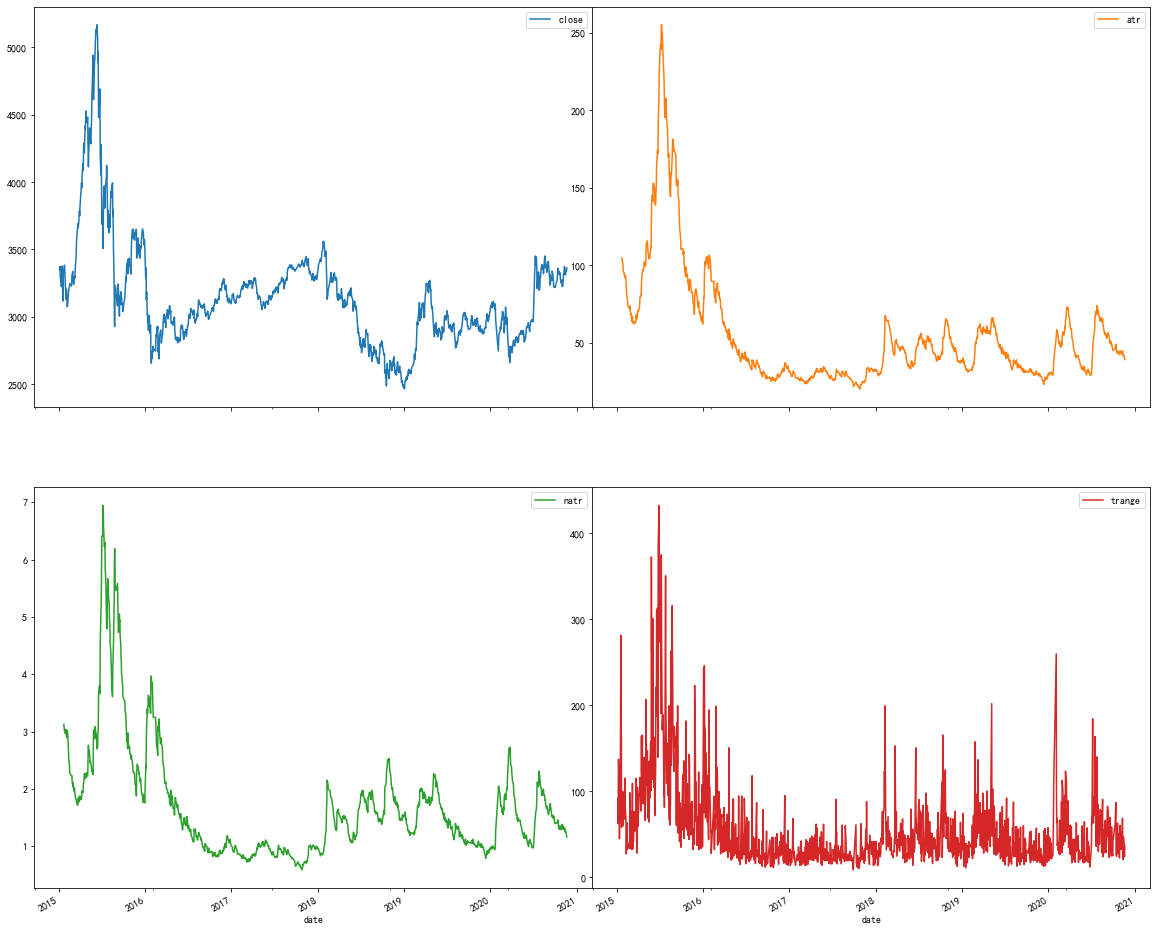

In [35]:
df[['close','atr','natr','trange']].plot(figsize=(20,18),
       subplots = True,layout=(2, 2))
plt.subplots_adjust(wspace=0,hspace=0.2)